In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup


In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
url = "https://www.amazon.in/Redmi-Horizon-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QSBF2T7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36", 
             "X-Amzn-Trace-Id": "Root=1-63cf0052-760b19697375364569cfc0d0"}

In [65]:
def get_soup(url):
    r = requests.get(url, headers=headers,params={'url': url, 'wait': 2})
    print("hi",r,"end")
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [66]:
print(get_soup(url).r)

hi <Response [200]> end
None


In [67]:
get_soup(url)

hi <Response [200]> end


<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [68]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Reviews': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [69]:
for x in tqdm_notebook(range(1,500)):
    soup = get_soup(f'https://www.amazon.in/Redmi-Horizon-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QSBF2T7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/499 [00:00<?, ?it/s]

hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [200]> end
hi <Response [20

In [70]:
df = pd.DataFrame(reviewlist)

In [71]:
df.head()

,Reviews
0,The first look of this starbust design is eye ...
1,Camera is not so good it's averageBack camera...
2,Good performance... Good touch response... Goo...
3,50 days usage...1. Good battery LIFE. Bqest fo...
4,If one needs to use this phone only for daily ...


In [72]:
df.tail()

,Reviews
2745,Battery issue battery gets drain i don't know ...
2746,Good phone for average users. (4/64 GB)Battery...
2747,Speaker quality is not good
2748,Quite a smooth daily driver phone. The overall...
2749,Good


In [73]:
df.shape

(2750, 1)

In [74]:
df.columns

Index(['Reviews'], dtype='object')

In [75]:
df.duplicated().sum()

2740

In [76]:
df.isnull().sum()

Reviews    0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  2750 non-null   object
dtypes: object(1)
memory usage: 21.6+ KB


In [78]:
text_total = " ".join(df["Reviews"])

In [79]:
text_total[:2000]

"The first look of this starbust design is eye catchy...no word to express its design,in hand feel and and it's all physical dimension. the second this which impress me, it's battery backup.....even you playing game hardly for a long time....it gives you sufficient battey backup and charging speed also 33W, is also a good deal at this price. The third impressive factor is it's dual speaker....I have an another phone of 40k and the sound quality is almost same as it. Media playback experience is also enhanced by it's amoled display, very colour charming display...... literally the display quality is unbeatable. The camera notch and dual speaker increase the media playing experience. Other Performance like gaming is also good at this price point. Fingerprint button is also very responsive. All other things and features are good to the price point.Only one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the

In [80]:
chars = sorted(list(set(text_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 "&'()*+,-./0123456789:ABCDEFGHIKLMNOPQRSTUVWYabcdefghijklmnopqrstuvwxyz❤️🌀💙🔋😤
78


In [81]:
df_new = df.copy()

In [82]:
import re 
import string

In [83]:
def cleaning_text(text):
    text = text.lower()
    text = re.sub('😤', "", text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[‘’“”…]', '', text)
    return text

cleaning = lambda x: cleaning_text(x)

In [84]:
df_new['Cleaned_Reviews'] = df_new.Reviews.apply(cleaning)

In [85]:
df_new

,Reviews,Cleaned_Reviews
0,The first look of this starbust design is eye ...,the first look of this starbust design is eye ...
1,Camera is not so good it's averageBack camera...,camera is not so good its averageback camera ...
2,Good performance... Good touch response... Goo...,good performance good touch response good batt...
3,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest for day...
4,If one needs to use this phone only for daily ...,if one needs to use this phone only for daily ...
...,...,...
2745,Battery issue battery gets drain i don't know ...,battery issue battery gets drain i dont know w...
2746,Good phone for average users. (4/64 GB)Battery...,good phone for average users 464 gbbattery bac...
2747,Speaker quality is not good,speaker quality is not good
2748,Quite a smooth daily driver phone. The overall...,quite a smooth daily driver phone the overall ...


In [86]:
clean_total = " ".join(df_new["Cleaned_Reviews"])
chars = sorted(list(set(clean_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 0123456789abcdefghijklmnopqrstuvwxyz❤️🌀💙🔋
42


In [87]:
df_new = df_new[df_new['Cleaned_Reviews']!='']

In [88]:
df_new

,Reviews,Cleaned_Reviews
0,The first look of this starbust design is eye ...,the first look of this starbust design is eye ...
1,Camera is not so good it's averageBack camera...,camera is not so good its averageback camera ...
2,Good performance... Good touch response... Goo...,good performance good touch response good batt...
3,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest for day...
4,If one needs to use this phone only for daily ...,if one needs to use this phone only for daily ...
...,...,...
2745,Battery issue battery gets drain i don't know ...,battery issue battery gets drain i dont know w...
2746,Good phone for average users. (4/64 GB)Battery...,good phone for average users 464 gbbattery bac...
2747,Speaker quality is not good,speaker quality is not good
2748,Quite a smooth daily driver phone. The overall...,quite a smooth daily driver phone the overall ...


In [89]:
from textblob import TextBlob

In [90]:
df_new['Cleaned_Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    the first look of this starbust design is eye ...
1    camera is not so good its  averageback camera ...
2    good performance good touch response good batt...
3    50 days usage good battery life best for daddy...
4    if one needs to use this phone only for daily ...
5    battery issue battery gets drain i dont know w...
6    good phone for average users 464 battery back ...
7                          speaker quality is not good
8    quite a smooth daily driver phone the overall ...
9                                                 good
Name: Cleaned_Reviews, dtype: object

In [91]:
df_new

,Reviews,Cleaned_Reviews
0,The first look of this starbust design is eye ...,the first look of this starbust design is eye ...
1,Camera is not so good it's averageBack camera...,camera is not so good its averageback camera ...
2,Good performance... Good touch response... Goo...,good performance good touch response good batt...
3,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest for day...
4,If one needs to use this phone only for daily ...,if one needs to use this phone only for daily ...
...,...,...
2745,Battery issue battery gets drain i don't know ...,battery issue battery gets drain i dont know w...
2746,Good phone for average users. (4/64 GB)Battery...,good phone for average users 464 gbbattery bac...
2747,Speaker quality is not good,speaker quality is not good
2748,Quite a smooth daily driver phone. The overall...,quite a smooth daily driver phone the overall ...


In [92]:
df_new.shape

(2750, 2)

In [93]:
df_new.duplicated().sum()

2740

In [94]:
df_new['Cleaned_Reviews'].duplicated().sum()

2740

In [95]:
df_new.drop_duplicates(subset=['Cleaned_Reviews'], keep=False)

,Reviews,Cleaned_Reviews


In [96]:
df_new.shape

(2750, 2)

In [97]:
freq = pd.Series(' '.join(df_new['Cleaned_Reviews']).split()).value_counts()[:10]

In [101]:
freq

is         7700
good       5775
the        5500
for        5500
camera     3850
and        3850
this       3575
to         3025
its        2475
battery    2475
dtype: int64

In [102]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users

True

In [103]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [104]:
df_new['Cleaned_Reviews'] = df_new['Cleaned_Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [106]:
df_new

,Reviews,Cleaned_Reviews
0,The first look of this starbust design is eye ...,first look starbust design eye catchyno word e...
1,Camera is not so good it's averageBack camera...,camera good averageback camera good price 💙🌀lo...
2,Good performance... Good touch response... Goo...,good performance good touch response good batt...
3,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest dayday ...
4,If one needs to use this phone only for daily ...,one needs use phone daily usage purpose best p...
...,...,...
2745,Battery issue battery gets drain i don't know ...,battery issue battery gets drain dont know thi...
2746,Good phone for average users. (4/64 GB)Battery...,good phone average users 464 gbbattery backup ...
2747,Speaker quality is not good,speaker quality good
2748,Quite a smooth daily driver phone. The overall...,quite smooth daily driver phone overall experi...


In [107]:
TextBlob(df_new['Cleaned_Reviews'][4]).ngrams(1)

[WordList(['one']),
 WordList(['needs']),
 WordList(['use']),
 WordList(['phone']),
 WordList(['daily']),
 WordList(['usage']),
 WordList(['purpose']),
 WordList(['best']),
 WordList(['price']),
 WordList(['range']),
 WordList(['dont']),
 WordList(['expect']),
 WordList(['good']),
 WordList(['quality']),
 WordList(['photo']),
 WordList(['video']),
 WordList(['gaming'])]

In [108]:
TextBlob(df_new['Cleaned_Reviews'][2]).ngrams(2)

[WordList(['good', 'performance']),
 WordList(['performance', 'good']),
 WordList(['good', 'touch']),
 WordList(['touch', 'response']),
 WordList(['response', 'good']),
 WordList(['good', 'battery']),
 WordList(['battery', 'life']),
 WordList(['life', 'good']),
 WordList(['good', 'charging']),
 WordList(['charging', 'speedaverage']),
 WordList(['speedaverage', 'camera']),
 WordList(['camera', 'clarity']),
 WordList(['clarity', 'average']),
 WordList(['average', 'led']),
 WordList(['led', 'flash']),
 WordList(['flash', 'lightnote']),
 WordList(['lightnote', 'selfie']),
 WordList(['selfie', 'photo']),
 WordList(['photo', 'lovers']),
 WordList(['lovers', 'dont']),
 WordList(['dont', 'go']),
 WordList(['go', 'average']),
 WordList(['average', 'mobile']),
 WordList(['mobile', 'money'])]

In [109]:
TextBlob(df_new['Cleaned_Reviews'][3]).ngrams(3)

[WordList(['50', 'days', 'usage1']),
 WordList(['days', 'usage1', 'good']),
 WordList(['usage1', 'good', 'battery']),
 WordList(['good', 'battery', 'life']),
 WordList(['battery', 'life', 'bqest']),
 WordList(['life', 'bqest', 'dayday']),
 WordList(['bqest', 'dayday', 'use']),
 WordList(['dayday', 'use', '33w']),
 WordList(['use', '33w', 'charger']),
 WordList(['33w', 'charger', 'also']),
 WordList(['charger', 'also', 'good2']),
 WordList(['also', 'good2', 'best']),
 WordList(['good2', 'best', 'display']),
 WordList(['best', 'display', 'shouldve']),
 WordList(['display', 'shouldve', '120hz']),
 WordList(['shouldve', '120hz', 'instead']),
 WordList(['120hz', 'instead', '903']),
 WordList(['instead', '903', 'sturdy']),
 WordList(['903', 'sturdy', 'inhand']),
 WordList(['sturdy', 'inhand', 'feel4']),
 WordList(['inhand', 'feel4', 'stereo']),
 WordList(['feel4', 'stereo', 'speaker']),
 WordList(['stereo', 'speaker', 'loud']),
 WordList(['speaker', 'loud', 'crisp6535']),
 WordList(['loud', 

In [110]:
freq_Sw = pd.Series(' '.join(df_new['Cleaned_Reviews']).split()).value_counts()[:20] 

In [125]:
freq_Sw

good           5775
camera         3850
battery        2475
dont           2200
also           1925
phone          1650
charging       1375
price          1375
average        1375
great          1100
life           1100
display        1100
quality        1100
performance     825
speaker         825
use             825
120hz           825
one             825
daily           825
experience      825
dtype: int64

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df_new["Cleaned_Reviews"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
print(word_freq_df.sort_values('occurrences',ascending = False).head())

        term  occurrences  frequency
113     good         5775   0.052239
40    camera         3850   0.034826
27   battery         2750   0.024876
75      dont         2200   0.019900
15      also         1925   0.017413


In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df_new["Cleaned_Reviews"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()

In [132]:
df1 = pd.DataFrame(denselist, columns = names_features)

In [133]:
df1

,10,100,1011,120hz,1257,33w,33watt,40k,464,4g,...,userssatsfactory,vary,video,watchers,way,web,website,wifi,word,y2
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.066972,0.0000,0.084725,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084725,0.000000,0.084725,0.084725
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2091,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.101057,0.127845,0.101057,0.0000,0.000000,0.000000,0.25569,...,0.000000,0.000000,0.000000,0.127845,0.127845,0.127845,0.000000,0.127845,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.323658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2746,0.162708,0.162708,0.162708,0.000000,0.000000,0.000000,0.0000,0.000000,0.162708,0.00000,...,0.162708,0.162708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2748,0.000000,0.000000,0.000000,0.260507,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [142]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [143]:
top2_words = get_top_n2_words(df_new["Cleaned_Reviews"], n=200) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,battery life,1100
1,good price,825
2,camera good,825
3,charging speed,550
4,also good,550


[Text(0, 0, 'battery life'),
 Text(1, 0, 'good price'),
 Text(2, 0, 'camera good'),
 Text(3, 0, 'charging speed'),
 Text(4, 0, 'also good'),
 Text(5, 0, 'good battery'),
 Text(6, 0, 'camera average'),
 Text(7, 0, 'dont know'),
 Text(8, 0, 'first look'),
 Text(9, 0, 'look starbust'),
 Text(10, 0, 'starbust design'),
 Text(11, 0, 'design eye'),
 Text(12, 0, 'eye catchyno'),
 Text(13, 0, 'catchyno word'),
 Text(14, 0, 'word express'),
 Text(15, 0, 'express designin'),
 Text(16, 0, 'designin hand'),
 Text(17, 0, 'hand feel'),
 Text(18, 0, 'feel physical'),
 Text(19, 0, 'physical dimension')]

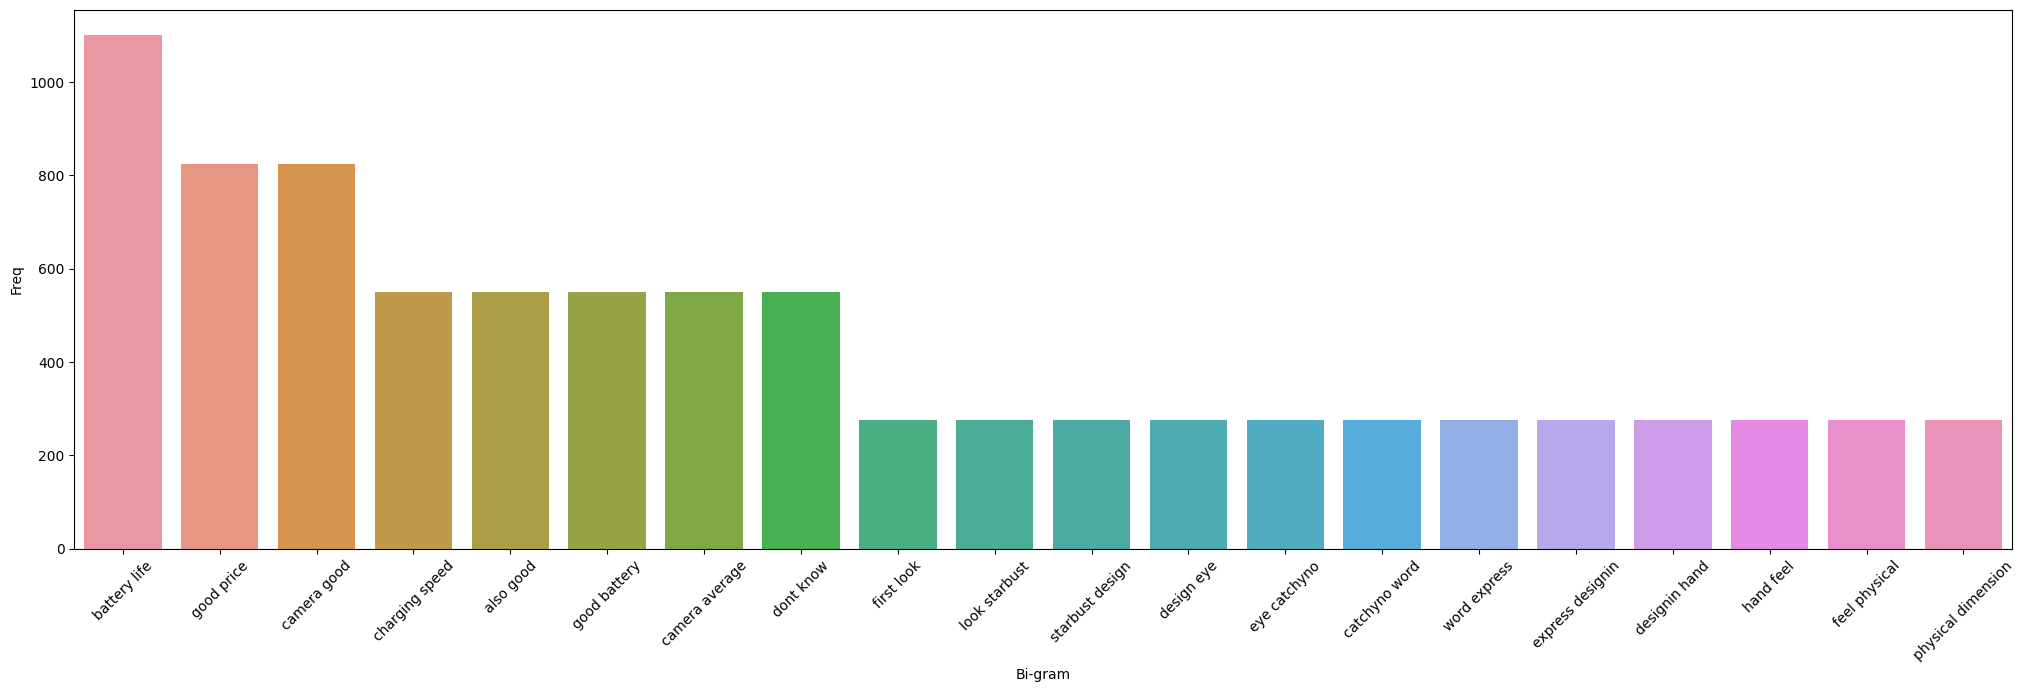

In [136]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [137]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [138]:
top3_words = get_top_n3_words(df_new["Cleaned_Reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,good battery life,550
1,first look starbust,275
2,look starbust design,275
3,starbust design eye,275
4,design eye catchyno,275
...,...,...
195,33w charger also,275
196,charger also good2,275
197,also good2 best,275
198,good2 best display,275


[Text(0, 0, 'good battery life'),
 Text(1, 0, 'first look starbust'),
 Text(2, 0, 'look starbust design'),
 Text(3, 0, 'starbust design eye'),
 Text(4, 0, 'design eye catchyno'),
 Text(5, 0, 'eye catchyno word'),
 Text(6, 0, 'catchyno word express'),
 Text(7, 0, 'word express designin'),
 Text(8, 0, 'express designin hand'),
 Text(9, 0, 'designin hand feel'),
 Text(10, 0, 'hand feel physical'),
 Text(11, 0, 'feel physical dimension'),
 Text(12, 0, 'physical dimension second'),
 Text(13, 0, 'dimension second impress'),
 Text(14, 0, 'second impress battery'),
 Text(15, 0, 'impress battery backupeven'),
 Text(16, 0, 'battery backupeven playing'),
 Text(17, 0, 'backupeven playing game'),
 Text(18, 0, 'playing game hardly'),
 Text(19, 0, 'game hardly long')]

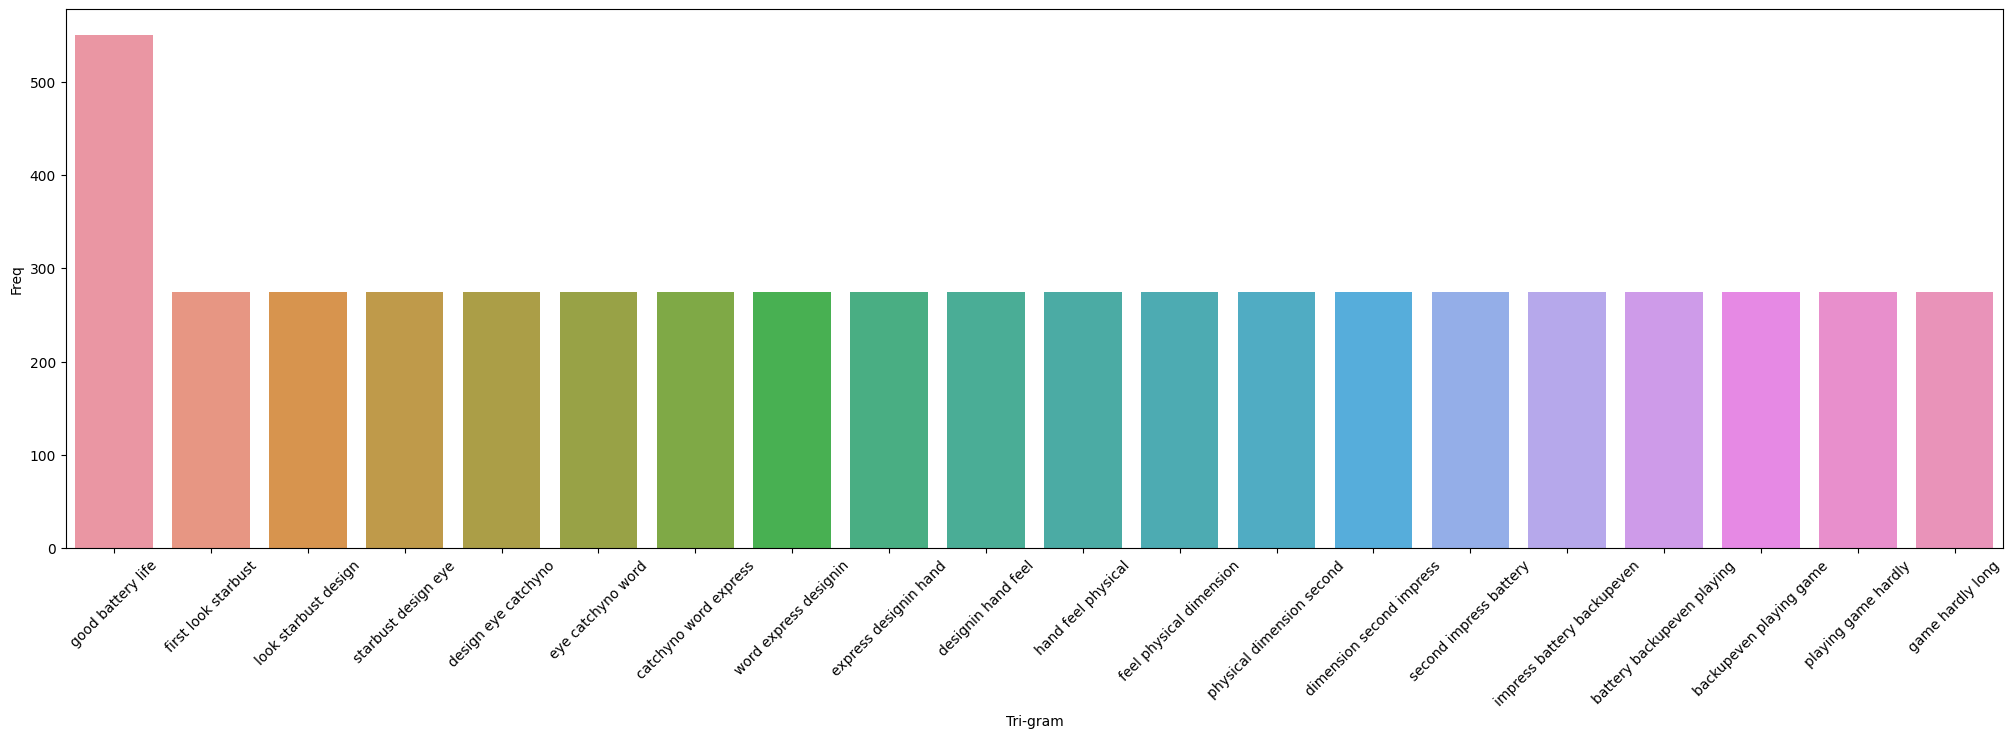

In [148]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [154]:
string_total = " ".join(df_new["Cleaned_Reviews"])
string_total[:2000]

'first look starbust design eye catchyno word express designin hand feel physical dimension second impress battery backupeven playing game hardly long timeit gives sufficient battey backup charging speed also 33w also good deal price third impressive factor dual speakeri another phone 40k sound quality almost media playback experience also enhanced amoled display colour charming display literally display quality unbeatable camera notch dual speaker increase media playing experience performance like gaming also good price point fingerprint button also responsive things features good price pointonly one thing disappointing bcoz hype camera company shows mark professional photography camera lower gradeeven old redmi y2 exchanged better camera plz request dont buy camerajust dont images shown camera pictures website illustration according mei dont recommend buy phone camera phoneif non camera user surely go itpros design inhand feel battery charging amoled displaydual speakercons camera ca

In [155]:
from wordcloud import WordCloud
wordcloud_generator = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_total)
fig = plt.figure(figsize = (20,20))
plt.imshow(wordcloud_generator)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [ ]:
fetch_sentiment_using_textblob = df_new.Cleaned_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())

,Cleaned_Reviews
positive,4491
negative,499


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...


True

In [147]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(df_new.Cleaned_Reviews[4])

NameError: name 'SentimentIntensityAnalyzer' is not defined

In [ ]:
df_score=pd.DataFrame()
df_score['Cleaned_Reviews'] = df_new.Cleaned_Reviews
df_score['scores'] = df_new['Cleaned_Reviews'].apply(lambda review: sid.polarity_scores(review))
df_score['compound']  = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >=0.75 else ('Negative' if c<=-0.75  else 'Neutral'))

In [ ]:
df_score

,Cleaned_Reviews,scores,compound,sentiment
0,first look starbust design eye catchyno word e...,"{'neg': 0.045, 'neu': 0.717, 'pos': 0.238, 'co...",0.9824,Positive
1,camera good averageback camera good price 💙🌀lo...,"{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'comp...",0.9796,Positive
2,50 days usage1 good battery life bqest dayday ...,"{'neg': 0.033, 'neu': 0.743, 'pos': 0.224, 'co...",0.9432,Positive
3,good phone average users 464 gbbattery backup ...,"{'neg': 0.071, 'neu': 0.791, 'pos': 0.138, 'co...",0.6369,Neutral
4,good performance good touch response good batt...,"{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'comp...",0.9493,Positive
...,...,...,...,...
4985,one needs use phone daily usage purpose best p...,"{'neg': 0.111, 'neu': 0.694, 'pos': 0.194, 'co...",0.4203,Neutral
4986,battery issue battery gets drain dont know thi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4987,speaker quality good,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Neutral
4988,quite smooth daily driver phone overall experi...,"{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...",0.9434,Positive


In [145]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [146]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Positive']])
generate_wordcloud(all_words)

NameError: name 'df_score' is not defined

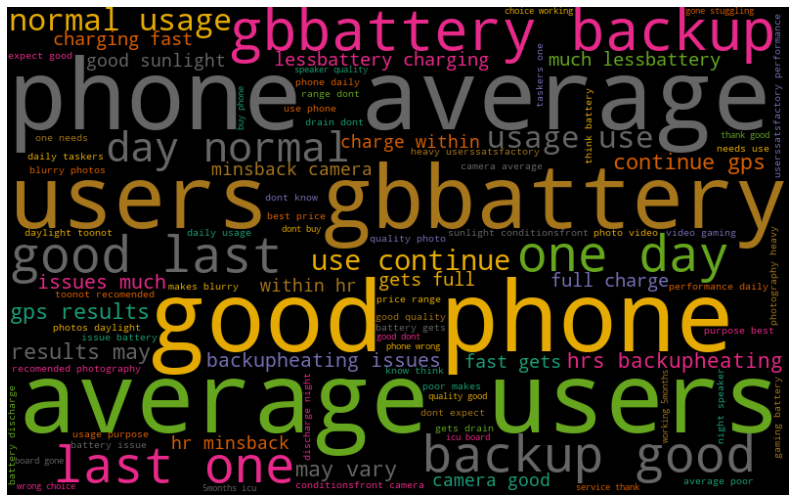

In [ ]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Neutral']])
generate_wordcloud(all_words)

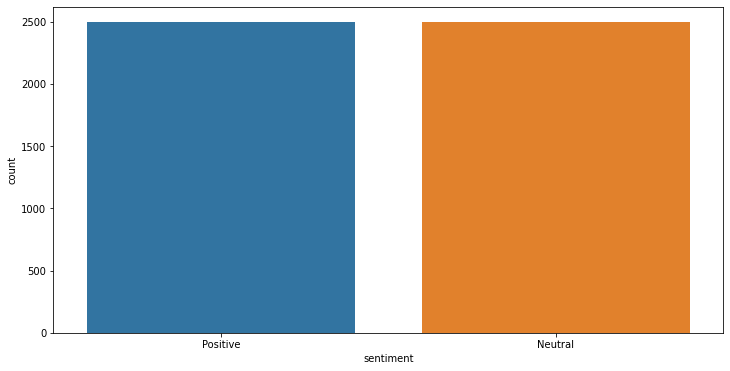

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_score)
plt.show()

In [144]:
label_data = df_score['sentiment'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sentiment', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

NameError: name 'df_score' is not defined